<a href="https://colab.research.google.com/github/Kancherla-Amulya/AIML-2303A51242/blob/main/week_6_adm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder
# Load the data
data = pd.read_csv('/content/university_student.csv')

# Display the first few rows of the dataframe
print(data.head())

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

# Separate numerical and categorical features
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create a OneHotEncoder for categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for compatibility with RandomForest

# Fit and transform the categorical features
encoded_categorical = encoder.fit_transform(X[categorical_features])

# Create a DataFrame from the encoded features
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

# Drop original categorical features and concatenate encoded features
X = X.drop(categorical_features, axis=1)
X = pd.concat([X, encoded_categorical_df], axis=1)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical feature data
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features]) # Only standardize numerical features
X_test[numerical_features] = scaler.transform(X_test[numerical_features]) # Only standardize numerical features

# Train a RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


   Student ID  Gender Date of Birth  Study Time Grade School Type  Absences  \
0           1    Male    1996-12-03          11     D      Public         2   
1           2  Female    2001-09-15           5     D     Private         0   
2           3    Male    2002-08-09           8     A     Private         2   
3           4    Male    1999-04-29           8     A     Private         3   
4           5    Male    1995-06-11           9     B     Private         1   

   Math Score  Reading Score  Writing Score  
0          72             91             69  
1          66             58             62  
2          75             99             77  
3          57             76             97  
4          78             51             78  
Accuracy: 0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Student ID     100 non-null    int64 
 1   Gender         100 non-null    object
 2   Date of Birth  100 non-null    object
 3   Study Time     100 non-null    int64 
 4   Grade          100 non-null    object
 5   School Type    100 non-null    object
 6   Absences       100 non-null    int64 
 7   Math Score     100 non-null    int64 
 8   Reading Score  100 non-null    int64 
 9   Writing Score  100 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 7.9+ KB
None
   Student ID  Gender Date of Birth  Study Time Grade School Type  Absences  \
0           1    Male    1996-12-03          11     D      Public         2   
1           2  Female    2001-09-15           5     D     Private         0   
2           3    Male    2002-08-09           8     A     Private         2   
3        

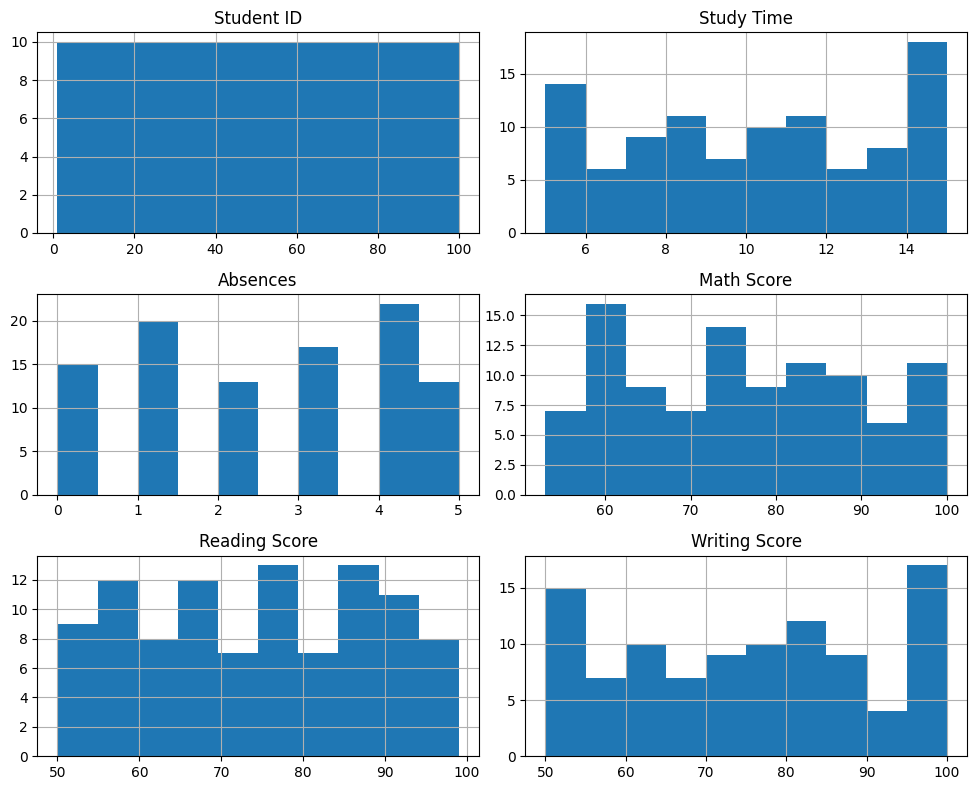

In [5]:
import pandas as pd

# Load the data
data = pd.read_csv('/content/university_student.csv')

# Display basic information about the dataset
print(data.info())

# Display the first few rows of the dataframe
print(data.head())

# Summary statistics of the data
print(data.describe())

# Checking for missing values
print(data.isnull().sum())

# Analyzing the target variable distribution (assuming the last column is the target variable)
target_variable = data.columns[-1]
print(data[target_variable].value_counts())

# Correlation matrix - Only include numerical features
numerical_data = data.select_dtypes(include=['number']) # Select only numerical columns
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

# Visualize the distribution of numerical features (if you have matplotlib installed)
import matplotlib.pyplot as plt

data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [6]:
# Import Pandas
import pandas as pd
# Import Pandas
import pandas as pd

# Load the dataset
file_path = '/content/university_student.csv'
df = pd.read_csv(file_path)

# Display the first few rows to confirm the dataset loaded correctly
df.head()
# Display the first few rows to confirm the dataset loaded correctly
df.head()

,Student ID,Gender,Date of Birth,Study Time,Grade,School Type,Absences,Math Score,Reading Score,Writing Score
0,1,Male,1996-12-03,11,D,Public,2,72,91,69
1,2,Female,2001-09-15,5,D,Private,0,66,58,62
2,3,Male,2002-08-09,8,A,Private,2,75,99,77
3,4,Male,1999-04-29,8,A,Private,3,57,76,97
4,5,Male,1995-06-11,9,B,Private,1,78,51,78


In [7]:
# Display only the Grade column
grades = df['Grade']
print(grades.head())

0    D
1    D
2    A
3    A
4    B
Name: Grade, dtype: object


In [8]:
df.isnull().sum()

,0
Student ID,0
Gender,0
Date of Birth,0
Study Time,0
Grade,0
School Type,0
Absences,0
Math Score,0
Reading Score,0
Writing Score,0


In [14]:
df_encoded=pd.get_dummies(df,columns=['Gender','School Type'],drop_first=True)


In [12]:
df_encoded

,Student ID,Date of Birth,Study Time,Grade,Absences,Math Score,Reading Score,Writing Score,Gender_Male,School Type_Public
0,1,1996-12-03,11,D,2,72,91,69,True,True
1,2,2001-09-15,5,D,0,66,58,62,False,False
2,3,2002-08-09,8,A,2,75,99,77,True,False
3,4,1999-04-29,8,A,3,57,76,97,True,False
4,5,1995-06-11,9,B,1,78,51,78,True,False
...,...,...,...,...,...,...,...,...,...,...
95,96,2004-12-04,8,C,1,87,85,88,False,True
96,97,2003-01-18,7,B,4,56,76,87,False,False
97,98,1999-01-24,14,A,2,95,66,83,False,False
98,99,2005-04-20,7,B,1,62,58,87,False,False


In [15]:
df_encoded['Gender_Male']=df_encoded['Gender_Male'].astype(int)


In [16]:
df_encoded

,Student ID,Date of Birth,Study Time,Grade,Absences,Math Score,Reading Score,Writing Score,Gender_Male,School Type_Public
0,1,1996-12-03,11,D,2,72,91,69,1,True
1,2,2001-09-15,5,D,0,66,58,62,0,False
2,3,2002-08-09,8,A,2,75,99,77,1,False
3,4,1999-04-29,8,A,3,57,76,97,1,False
4,5,1995-06-11,9,B,1,78,51,78,1,False
...,...,...,...,...,...,...,...,...,...,...
95,96,2004-12-04,8,C,1,87,85,88,0,True
96,97,2003-01-18,7,B,4,56,76,87,0,False
97,98,1999-01-24,14,A,2,95,66,83,0,False
98,99,2005-04-20,7,B,1,62,58,87,0,False


In [17]:
df_encoded['School Type_Public']=df_encoded['School Type_Public'].astype(int)

In [18]:
df_encoded

,Student ID,Date of Birth,Study Time,Grade,Absences,Math Score,Reading Score,Writing Score,Gender_Male,School Type_Public
0,1,1996-12-03,11,D,2,72,91,69,1,1
1,2,2001-09-15,5,D,0,66,58,62,0,0
2,3,2002-08-09,8,A,2,75,99,77,1,0
3,4,1999-04-29,8,A,3,57,76,97,1,0
4,5,1995-06-11,9,B,1,78,51,78,1,0
...,...,...,...,...,...,...,...,...,...,...
95,96,2004-12-04,8,C,1,87,85,88,0,1
96,97,2003-01-18,7,B,4,56,76,87,0,0
97,98,1999-01-24,14,A,2,95,66,83,0,0
98,99,2005-04-20,7,B,1,62,58,87,0,0


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
label_encoder=LabelEncoder()

In [21]:
df_encoded['Grade']=label_encoder.fit_transform(df_encoded['Grade'])

In [22]:
df_encoded

,Student ID,Date of Birth,Study Time,Grade,Absences,Math Score,Reading Score,Writing Score,Gender_Male,School Type_Public
0,1,1996-12-03,11,3,2,72,91,69,1,1
1,2,2001-09-15,5,3,0,66,58,62,0,0
2,3,2002-08-09,8,0,2,75,99,77,1,0
3,4,1999-04-29,8,0,3,57,76,97,1,0
4,5,1995-06-11,9,1,1,78,51,78,1,0
...,...,...,...,...,...,...,...,...,...,...
95,96,2004-12-04,8,2,1,87,85,88,0,1
96,97,2003-01-18,7,1,4,56,76,87,0,0
97,98,1999-01-24,14,0,2,95,66,83,0,0
98,99,2005-04-20,7,1,1,62,58,87,0,0


In [23]:
df_encoded['Date of Birth']=pd.to_datetime(df_encoded['Date of Birth'])

In [24]:
df_encoded['Age']=pd.to_datetime('today').year-df_encoded['Date of Birth'].dt.year

In [25]:
df_encoded['Total Score']=df_encoded['Math Score']+df_encoded['Reading Score']+df_encoded['Writing Score']

In [26]:
df_encoded

,Student ID,Date of Birth,Study Time,Grade,Absences,Math Score,Reading Score,Writing Score,Gender_Male,School Type_Public,Age,Total Score
0,1,1996-12-03,11,3,2,72,91,69,1,1,29,232
1,2,2001-09-15,5,3,0,66,58,62,0,0,24,186
2,3,2002-08-09,8,0,2,75,99,77,1,0,23,251
3,4,1999-04-29,8,0,3,57,76,97,1,0,26,230
4,5,1995-06-11,9,1,1,78,51,78,1,0,30,207
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2004-12-04,8,2,1,87,85,88,0,1,21,260
96,97,2003-01-18,7,1,4,56,76,87,0,0,22,219
97,98,1999-01-24,14,0,2,95,66,83,0,0,26,244
98,99,2005-04-20,7,1,1,62,58,87,0,0,20,207
